In [2]:
path = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,Dropout , BatchNormalization
from tensorflow.keras.regularizers import l2
import random
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-02-28 20:39:02.523619: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-28 20:39:02.523734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-28 20:39:02.649923: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
os.environ['TF_DISABLE_MEMORY_OPTIMIZATION'] = '1'

In [6]:
animals = os.listdir(path)
#animals = random.sample(animals, 1)
images = []
labels = []

In [8]:
from matplotlib import pyplot as plt

In [9]:
for animal in animals:
    animal_dir = os.path.join(path, animal)
    for img_file in os.listdir(animal_dir):
    #for img_file in random.sample(os.listdir(animal_dir), 3000):
        img_path = os.path.join(animal_dir, img_file)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Eroare: Imaginea nu a fost încărcată. Verifică calea: {img_path}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))
        images.append(image)
        labels.append(animal)

Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6059.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11849.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3288.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6238.jpg


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2688.jpg


Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7112.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/8730.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11702.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7133.jpg


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11853.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7969.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7459.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10747.jpg


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6718.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2877.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3136.jpg


Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11675.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/4367.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/Thumbs.db
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/5604.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/9188.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3588.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11410.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1308.jpg
Eroare: Imaginea nu a fost încărcată.

Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1866.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7369.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10797.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10401.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/5736.jpg


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/4833.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/850.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/8470.jpg


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11210.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/660.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/140.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10820.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10501.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/9171.jpg


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/9778.jpg


Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/2663.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11935.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10125.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11874.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/936.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/Thumbs.db
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/5553.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/7978.jpg
Eroare: Imaginea nu a fost încărcată.

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/666.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/7968.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11565.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10404.jpg
Eroare: Imaginea nu a fost încărcată. Verifică calea: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/9565.jpg


In [10]:
def count_images(path):
    cat_count = 0
    dog_count = 0
    
    for animal in os.listdir(path):
        animal_dir = os.path.join(path, animal)
        if animal.lower() == 'cat':
            cat_count += len(os.listdir(animal_dir))
        elif animal.lower() == 'dog':
            dog_count += len(os.listdir(animal_dir))
    
    return cat_count, dog_count

In [11]:
def plot_proportion(cat_count, dog_count):
    labels = ['Cats', 'Dogs']
    counts = [cat_count, dog_count]
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color=['blue', 'orange'])
    plt.xlabel('Animal Type')
    plt.ylabel('Number of Images')
    plt.title('Proportion of Cat and Dog Images')
    plt.show()

In [12]:
cat_count, dog_count = count_images(path)
print(f"Number of cat images: {cat_count}")
print(f"Number of dog images: {dog_count}")

Number of cat images: 12501
Number of dog images: 12501


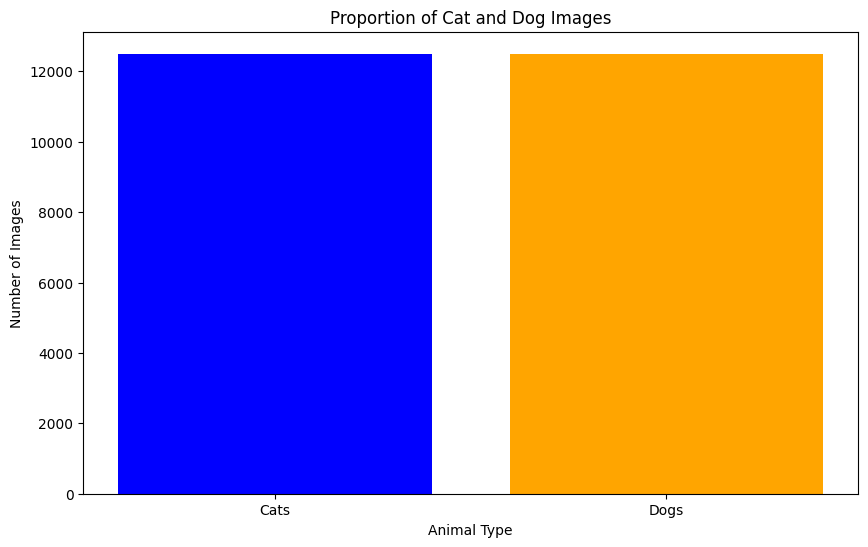

In [13]:
plot_proportion(cat_count, dog_count)

In [14]:
images = np.array(images)
labels = np.array(labels)
#print(len(images))
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)
print(len(animals))
print(animals)

2
['Dog', 'Cat']


In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

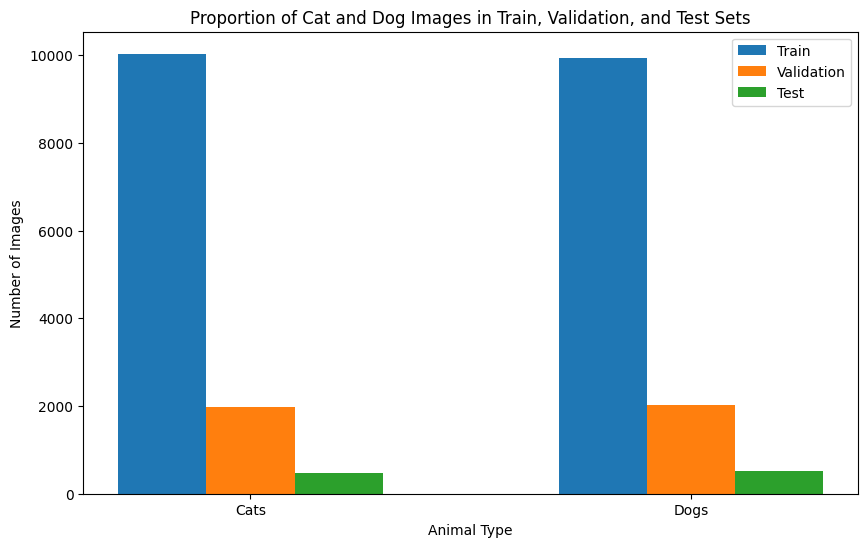

In [25]:
# Function to count the number of cats and dogs
def count_animals(y):
    cats = np.sum(np.argmax(y, axis=1) == 0)
    dogs = np.sum(np.argmax(y, axis=1) == 1)
    return cats, dogs

# Count animals in each subset
train_cats, train_dogs = count_animals(y_train)
val_cats, val_dogs = count_animals(y_val)
test_cats, test_dogs = count_animals(y_test)

# Plot the proportions
labels = ['Cats', 'Dogs']
train_counts = [train_cats, train_dogs]
val_counts = [val_cats, val_dogs]
test_counts = [test_cats, test_dogs]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, train_counts, width, label='Train')
bars2 = ax.bar(x, val_counts, width, label='Validation')
bars3 = ax.bar(x + width, test_counts, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Animal Type')
ax.set_ylabel('Number of Images')
ax.set_title('Proportion of Cat and Dog Images in Train, Validation, and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3) , kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu' , kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu' , kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu' , kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu' , kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(2, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [19]:
checkpoint = ModelCheckpoint('best_model_weights.keras', 
                             monitor='val_accuracy', 
                             save_best_only=True,    
                             mode='max') 

In [20]:
optimazer=Adam(learning_rate=0.0001)

In [21]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [22]:
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history=model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint, reduce_lr,early_stopping])

Epoch 1/30


2025-02-28 20:45:30.999996: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[64,32,254,254]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,256,256]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2025-02-28 20:45:31.025252: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 285: 4.39352, expected 3.84026
2025-02-28 20:45:31.025295: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 577: 4.50703, expected 3.95377
2025-02-28 20:45:31.025305: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 708: 4.47864, expected 3.92538
2025-02-28 20:45:31.025313: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Differe

  2/312 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.4492 - loss: 9.5821   

I0000 00:00:1740775548.742353     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5854 - loss: 8.5528

2025-02-28 20:46:18.940376: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.35893, expected 5.37832
2025-02-28 20:46:18.940458: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.63447, expected 4.65387
2025-02-28 20:46:18.940469: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.24125, expected 6.26065
2025-02-28 20:46:18.940477: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.91892, expected 6.93831
2025-02-28 20:46:18.940485: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.64317, expected 6.66257
2025-02-28 20:46:18.940493: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 7.95799, expected 6.97739
2025-02-28 20:46:18.940501: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 8.40363, expected 7.42303
2025-02-28 20:46:18.940509: E external/local_xla/xla/se

312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5855 - loss: 8.5506

2025-02-28 20:46:38.856226: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.77182, expected 5.82124
2025-02-28 20:46:38.856286: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.92804, expected 5.97746
2025-02-28 20:46:38.856302: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 8.10216, expected 7.15158
2025-02-28 20:46:38.856316: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 8.21711, expected 7.26653
2025-02-28 20:46:38.856330: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.74925, expected 6.79867
2025-02-28 20:46:38.856340: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 8.20216, expected 7.25158
2025-02-28 20:46:38.856350: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 8.02167, expected 7.07109
2025-02-28 20:46:38.856361: E external/local_xla/xla/se

312/312 ━━━━━━━━━━━━━━━━━━━━ 80s 172ms/step - accuracy: 0.5856 - loss: 8.5485 - val_accuracy: 0.6097 - val_loss: 6.7364 - learning_rate: 1.0000e-04
Epoch 2/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.6605 - loss: 6.3325 - val_accuracy: 0.5867 - val_loss: 5.8281 - learning_rate: 1.0000e-04
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.7084 - loss: 4.9643 - val_accuracy: 0.6065 - val_loss: 4.6016 - learning_rate: 1.0000e-04
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.7414 - loss: 3.9497 - val_accuracy: 0.7062 - val_loss: 3.5383 - learning_rate: 1.0000e-04
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.7609 - loss: 3.2295 - val_accuracy: 0.7029 - val_loss: 3.1146 - learning_rate: 1.0000e-04
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.7909 - loss: 2.6516 - val_accuracy: 0.7360 - val_loss: 2.6227 - learning_rate: 1.0000e-04
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accura

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2025-02-28 21:00:23.405354: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 5.22285, expected 4.50617
2025-02-28 21:00:23.405433: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19: 4.83523, expected 4.11855
2025-02-28 21:00:23.405443: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20: 6.14347, expected 5.42679
2025-02-28 21:00:23.405452: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21: 5.72417, expected 5.00749
2025-02-28 21:00:23.405461: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.00776, expected 5.29109
2025-02-28 21:00:23.405469: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 5.39609, expected 4.67941
2025-02-28 21:00:23.405477: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 5.14673, expected 4.43005
2025-02-28 21:00:23.405485: E external/local_xla/

31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8841 - loss: 1.0225

2025-02-28 21:00:27.152941: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129443: 3.86755, expected 3.36924
2025-02-28 21:00:27.153006: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129931: 3.66774, expected 3.16943
2025-02-28 21:00:27.153051: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 132271: 3.70772, expected 3.20941
2025-02-28 21:00:27.153065: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 132525: 3.69247, expected 3.19416
2025-02-28 21:00:27.153091: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 134822: 3.80393, expected 3.30562
2025-02-28 21:00:27.153103: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 135076: 3.77675, expected 3.27844
2025-02-28 21:00:27.153117: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 135330: 3.93179, expected 3.43348
2025-02-28 21:00:27.

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8845 - loss: 1.0275
Test Loss: 1.1038153171539307
Test Accuracy: 0.891783595085144


In [27]:

def plot_loss(history):
    plt.figure(figsize=(10, 5))
    
    # Grafic pentru pierdere
    plt.subplot(1, 2, 1) #1 rând și 2 coloane de subploturi și selectează primul subplot (stânga).
    plt.plot(history.history['loss'], label='Training Loss')  #este o listă de valori ale pierderii obținute în timpul antrenamentului pentru fiecare epocă.
    plt.plot(history.history['val_loss'], label='Validation Loss') #Plotează valorile pierderii de validare (val_loss) pentru fiecare epocă de antrenament
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training  Loss VS Validation Loss')
   
    # Grafic pentru acuratețe
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training Accuracy VS Validation Accuracy')
    


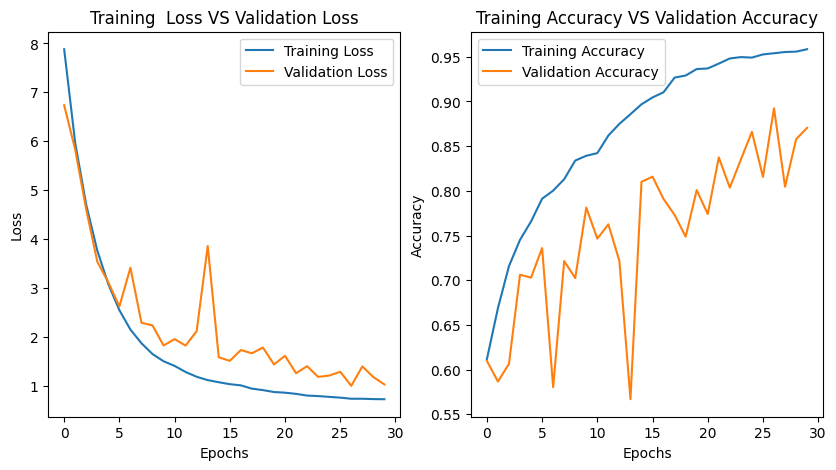

In [28]:
plot_loss(history)

In [29]:
def predict_image(image_path): 
    # Citește și preprocesează imaginea
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img_tensor = np.expand_dims(img, axis=0)
    img_tensor = img_tensor / 255.0

    # Afișează datele preprocesate pentru verificare
    print("Forma tensorului de imagine:", img_tensor.shape)
    print("Valorile pixelilor (primii 5):", img_tensor.flatten()[:5])

    # Realizează predicția
    prediction = model.predict(img_tensor)

    # Afișează vectorul de predicție pentru diagnosticare
    print("Vectorul de predicție:", prediction)

    # Interpretează rezultatul
    cat_prob = prediction[0][0] * 100  # Probabilitatea ca imaginea să fie o pisică
    dog_prob = (1 - prediction[0][0]) * 100  # Probabilitatea ca imaginea să fie un câine

    print(f"Probabilitatea ca imaginea să fie o pisică: {cat_prob:.2f}%")
    print(f"Probabilitatea ca imaginea să fie un câine: {dog_prob:.2f}%")

    if cat_prob > dog_prob:
        print("Imaginea este o pisică.")
    else:
        print("Imaginea este un câine.")

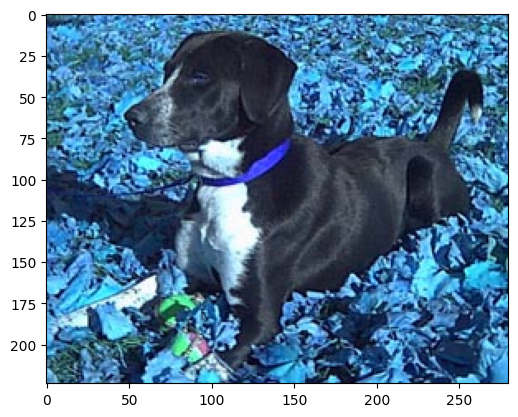

In [30]:
img = cv2.imread('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10071.jpg')
plt.imshow(img)
plt.show()

In [31]:
predict_image('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10071.jpg')

Forma tensorului de imagine: (1, 256, 256, 3)
Valorile pixelilor (primii 5): [0.40392157 0.37647059 0.16470588 0.52941176 0.50196078]


2025-02-28 21:01:15.968548: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387127: 5.77154, expected 5.03187
2025-02-28 21:01:15.968633: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387168: 6.05753, expected 5.31786
2025-02-28 21:01:15.968653: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387274: 5.79451, expected 5.05483
2025-02-28 21:01:15.968665: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387303: 6.3865, expected 5.64683
2025-02-28 21:01:15.968680: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387310: 6.3852, expected 5.64553
2025-02-28 21:01:15.968695: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387370: 6.37416, expected 5.63449
2025-02-28 21:01:15.968709: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387381: 4.72788, expected 3.98821
2025-02-28 21:01:15.96

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
Vectorul de predicție: [[1.0725673e-26 1.0000000e+00]]
Probabilitatea ca imaginea să fie o pisică: 0.00%
Probabilitatea ca imaginea să fie un câine: 100.00%
Imaginea este un câine.


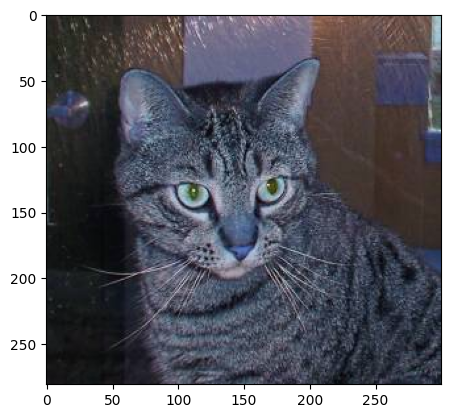

In [40]:
img = cv2.imread('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/1.jpg')
plt.imshow(img)
plt.show()

In [41]:
predict_image('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/1.jpg')

Forma tensorului de imagine: (1, 256, 256, 3)
Valorile pixelilor (primii 5): [0.14117647 0.16078431 0.14509804 0.14509804 0.16470588]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Vectorul de predicție: [[4.5037037e-26 1.0000000e+00]]
Probabilitatea ca imaginea să fie o pisică: 0.00%
Probabilitatea ca imaginea să fie un câine: 100.00%
Imaginea este un câine.
